In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

bikes = pd.read_pickle('../Downloads/BikesDataVars_new.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [4]:
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_meam = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

bikes_week = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_meam], axis=1)
bikes_week.head()

,Rental Count,Temperature,Humidity,Wind speed
week,,,,
1,39441,-2.694940,43.660714,1.524405
2,30871,-5.079762,53.958333,1.995833
3,42193,2.662500,55.178571,1.385119
4,23079,-10.038690,38.410714,2.575000
5,28415,-5.650595,47.815476,2.256548


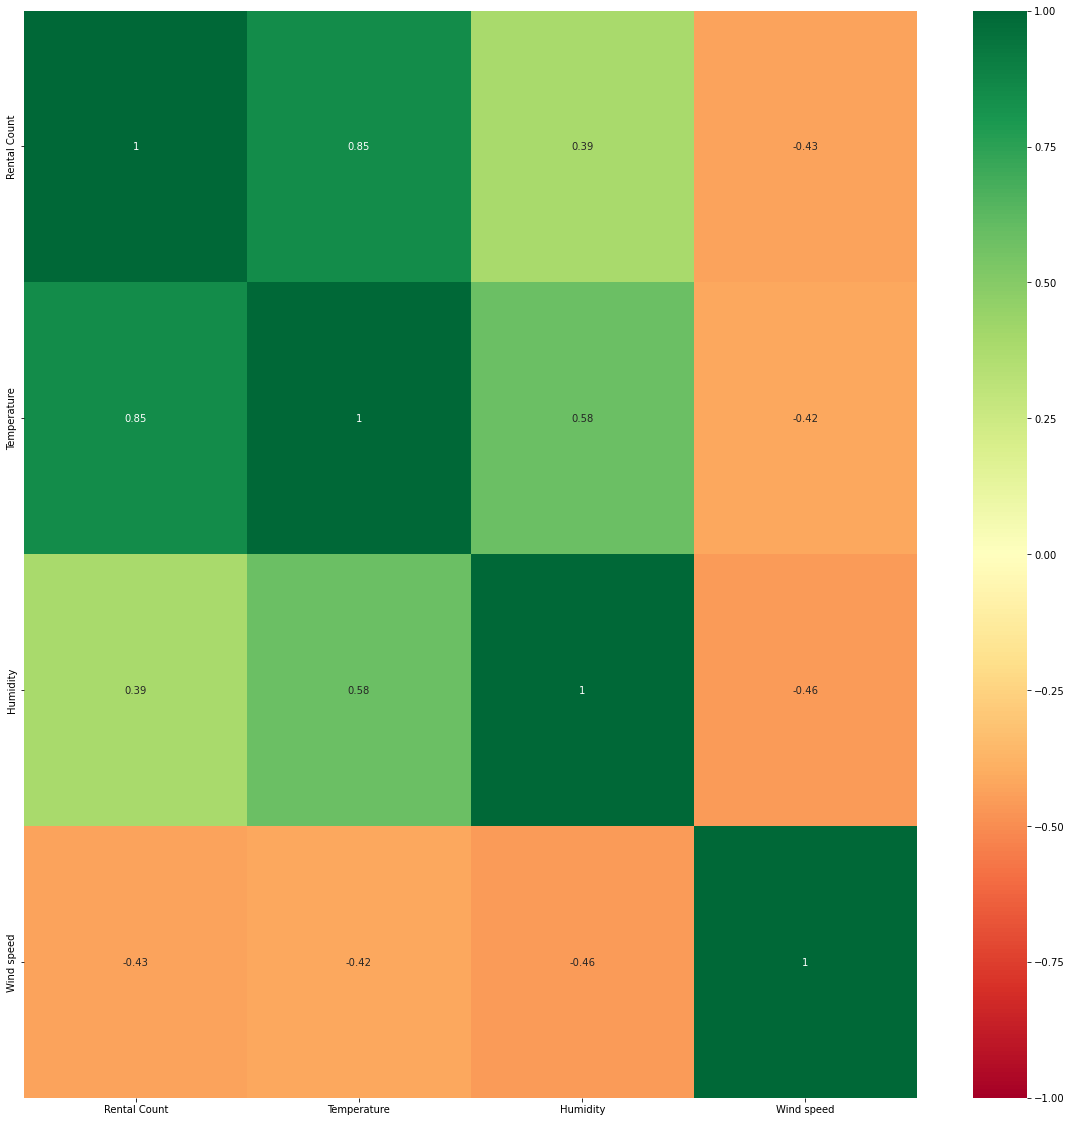

In [5]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(bikes_week.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

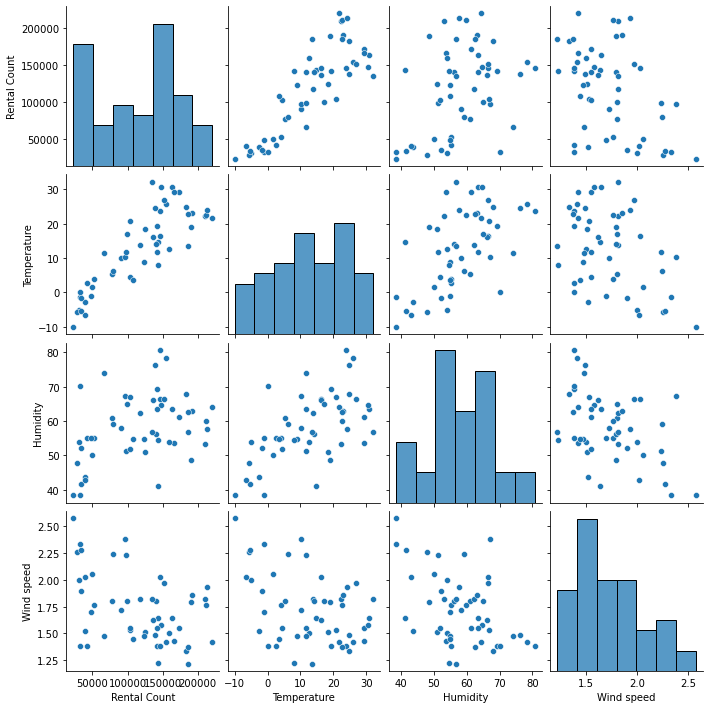

In [7]:
sns.pairplot(bikes_week);

In [9]:
X = bikes_week['Temperature']
y = bikes_week['Rental Count']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=4309.320603391841, intercept=61741.699243285024, rvalue=0.8458075200534889, pvalue=2.992184317240584e-15, stderr=384.39441030665824, intercept_stderr=6596.057490467339)


In [10]:
r_sq = res.rvalue ** 2
r_sq

0.7153903609790331

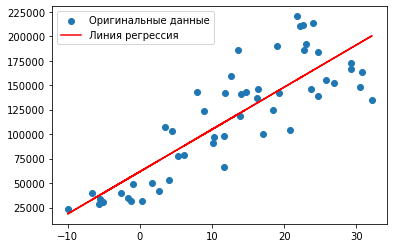

In [13]:
plt.scatter(X, y, label='Оригинальные данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label='Линия регрессия')
plt.legend()
plt.show()

In [17]:
X_simple = bikes_week['Temperature']
y = bikes_week['Rental Count']
X_simple_constatnt = sm.add_constant(X_simple)

model = sm.OLS(y, X_simple_constatnt)
res_simple = model.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     125.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.99e-15
Time:                        16:58:05   Log-Likelihood:                -611.13
No. Observations:                  52   AIC:                             1226.
Df Residuals:                      50   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.174e+04   6596.057      9.360      

In [18]:
X_mult = sm.add_constant(bikes_week.drop('Rental Count', axis=1))

model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     47.63
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.99e-14
Time:                        17:01:59   Log-Likelihood:                -607.91
No. Observations:                  52   AIC:                             1224.
Df Residuals:                      48   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.756e+05   4.61e+04      3.807      

In [19]:
data = pd.read_csv('../Downloads/CandyData.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


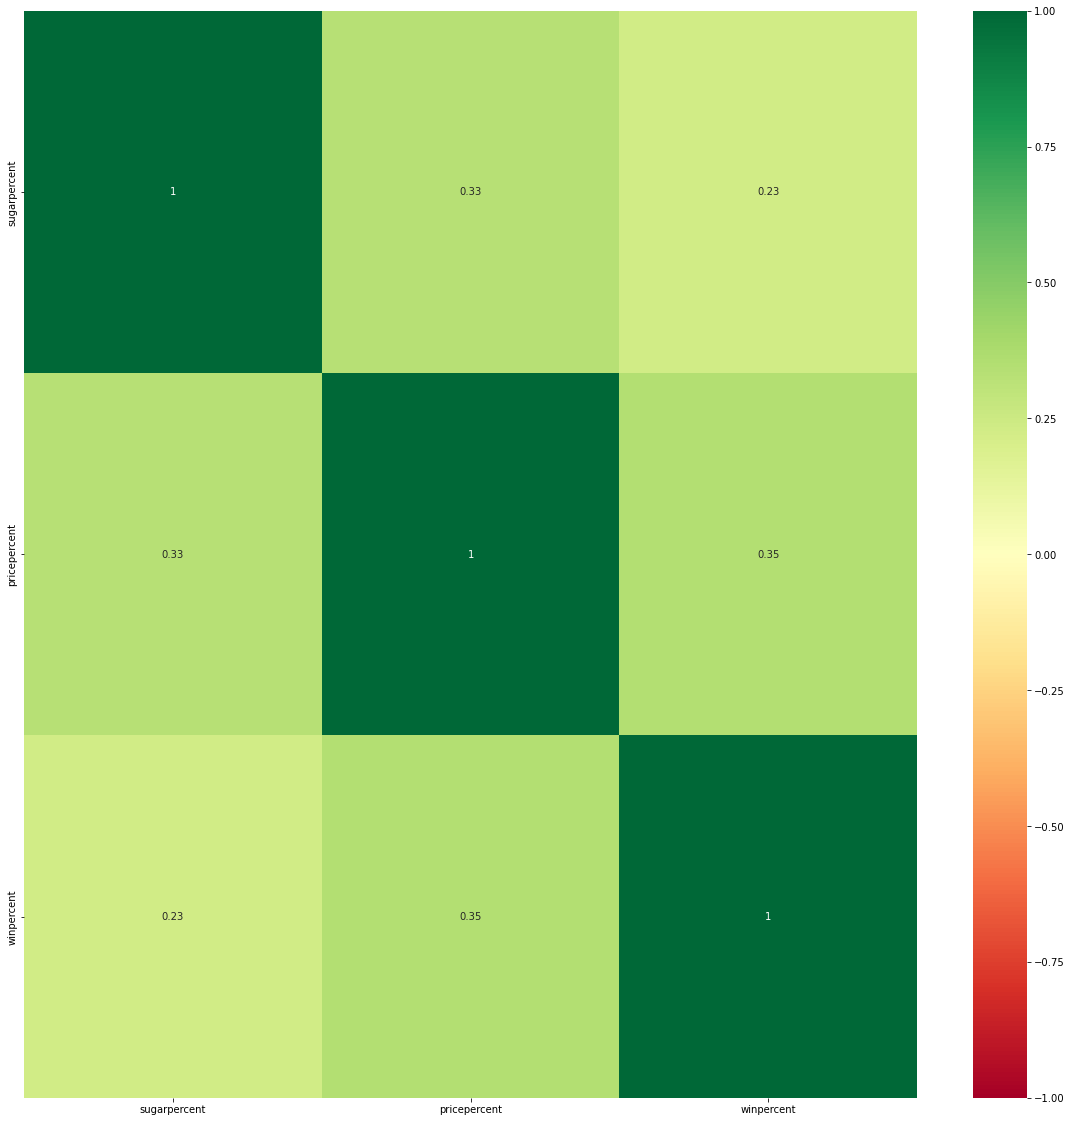

In [20]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(data[['sugarpercent', 'pricepercent', 'winpercent']].corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

In [32]:
X = data['winpercent']
y = data['sugarpercent']

res = scipy.stats.linregress(y, X)
print(res, res.rvalue ** 2)

LinregressResult(slope=11.923863286810722, intercept=44.60944180753465, rvalue=0.22915065712800645, pvalue=0.034897896761698376, stderr=5.5596076890773345, intercept_stderr=3.0860859920175674) 0.052510023662197175


In [26]:
X_mult = sm.add_constant(data[['sugarpercent', 'pricepercent']])
y = data['winpercent']
model = sm.OLS(y, X_mult)
res_mult = model.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:             winpercent   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     6.353
Date:                Sun, 05 Mar 2023   Prob (F-statistic):            0.00272
Time:                        17:45:16   Log-Likelihood:                -342.53
No. Observations:                  85   AIC:                             691.1
Df Residuals:                      82   BIC:                             698.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7867      3.438     11.574   

In [2]:
df = pd.read_csv('../Downloads/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,target
0,63,1,3,145,233,1,0,150,0,1
1,37,1,2,130,250,0,1,187,0,1
2,41,0,1,130,204,0,0,172,0,1
3,56,1,1,120,236,0,1,178,0,1
4,57,0,0,120,354,0,1,163,1,1


In [3]:
columns_num = ['age', 'trestbps', 'chol', 'thalach']

In [7]:
X = sm.add_constant(df['sex'])
y = df['target']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.648180
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                 0.05948
Time:                        17:55:01   Log-Likelihood:                -196.40
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 6.226e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0986      0.236      4.661      0.000       0.637       1.561
sex           -1.3022      0.

In [8]:
np.exp(1.0986)

2.9999631342221873

In [9]:
np.exp(-1.3022)

0.27193288213288974

In [12]:
df.groupby('target')['sex'].value_counts().unstack()

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
p_1_female = 72 / (72 + 24)
p_0_female = 1 - p_1_female
odds_1_female = p_1_female / p_0_female
print(odds_1_female)
print(np.log(odds_1_female))

3.0
1.0986122886681098


In [15]:
X = sm.add_constant(df.drop(['cp', 'target'], axis=1))
y = df['target']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.480864
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.3023
Time:                        18:02:23   Log-Likelihood:                -145.70
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.705e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2171      2.040      0.597      0.551      -2.782       5.216
age           -0.0231      0.

In [16]:
X = sm.add_constant(df[columns_num])
y = df['target']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.580461
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.1577
Time:                        18:04:37   Log-Likelihood:                -175.88
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.680e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2241      1.662     -1.940      0.052      -6.481       0.032
age           -0.0054      0.

In [17]:
X = sm.add_constant(df[columns_num] - df[columns_num].mean())
y = df['target']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.580461
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.1577
Time:                        18:05:44   Log-Likelihood:                -175.88
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.680e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1947      0.129      1.505      0.132      -0.059       0.448
age           -0.0054      0.

In [20]:
X = sm.add_constant((df[columns_num] - df[columns_num].mean()) / df[columns_num].std())
y = df['target']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.580461
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.1577
Time:                        18:07:56   Log-Likelihood:                -175.88
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 1.680e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1947      0.129      1.505      0.132      -0.059       0.448
age           -0.0489      0.

In [21]:
data = pd.read_csv('../Downloads/CandyData.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [38]:
data['winpercent_0_1'] = np.where(data['winpercent'] >= 50, 1, 0)

In [47]:
X = sm.add_constant(data['sugarpercent'])
y = data['winpercent_0_1']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.672972
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:         winpercent_0_1   No. Observations:                   85
Model:                          Logit   Df Residuals:                       83
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                 0.02433
Time:                        20:07:02   Log-Likelihood:                -57.203
converged:                       True   LL-Null:                       -58.629
Covariance Type:            nonrobust   LLR p-value:                   0.09122
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8058      0.447     -1.803      0.071      -1.682       0.070
sugarpercent     1.3276

In [41]:
np.exp(-0.8058)

0.4467303992481016

In [42]:
np.exp(1.3276)

3.771979764137272

In [44]:
np.exp(-1.6935)

0.18387483452370543

In [45]:
X = sm.add_constant(data[['sugarpercent', 'pricepercent']] - data[['sugarpercent', 'pricepercent']].mean())
y = data['winpercent_0_1']

logit = sm.Logit(y, X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.619123
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         winpercent_0_1   No. Observations:                   85
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Mar 2023   Pseudo R-squ.:                  0.1024
Time:                        20:05:51   Log-Likelihood:                -52.625
converged:                       True   LL-Null:                       -58.629
Covariance Type:            nonrobust   LLR p-value:                  0.002470
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1916      0.235     -0.816      0.414      -0.652       0.269
sugarpercent     0.5896

In [46]:
np.exp(-0.1916)

0.8256370572724328